In [2]:
import matplotlib.pyplot as plt
from csv import DictReader
import numpy as np
from datetime import datetime


podatki = []
dtype = [
    ('Date', 'U10'),
    ('Time', 'U10'),
    ('Location', 'U100'),
    ('Operator', 'U100'),
    ('Flight', 'U100'),
    ('Route', 'U100'),
    ('Type', 'U100'),
    ('Registration', 'U100'),
    ('cn_In', 'U100'),
    ('Aboard', np.int32),
    ('Fatalities', np.int32),
    ('Ground', np.int32),
    ('Summary', 'U1000')
]

with open("podatki\Airplane_Crashes_and_Fatalities_Since_1908.csv", 'r', encoding='utf-8') as file:
    csv_reader = DictReader(file)
    for row in csv_reader:
        date_str = row['Date']
        date_obj = datetime.strptime(date_str, '%m/%d/%Y')
        date_fixed = date_obj.strftime('%Y-%m-%d')
        
        time = row['Time']
        location = row['Location']
        operator = row['Operator']
        flightNr = row['Flight #']
        route = row['Route']
        type = row['Type']
        registration = row['Registration']
        CnIn = row['cn/In']
        aboard = int(row["Aboard"]) if row["Aboard"] else 0
        fatalities = int(row["Fatalities"]) if row["Fatalities"] else 0
        ground = int(row['Ground']) if row["Ground"] else 0
        summary = row['Summary']
        podatki.append((date_fixed, time, location, operator, flightNr, route, type, registration, CnIn, aboard, fatalities, ground, summary))



In [3]:
#Katera leta so bila najbolj nesrečna za potnike letalskega prometa

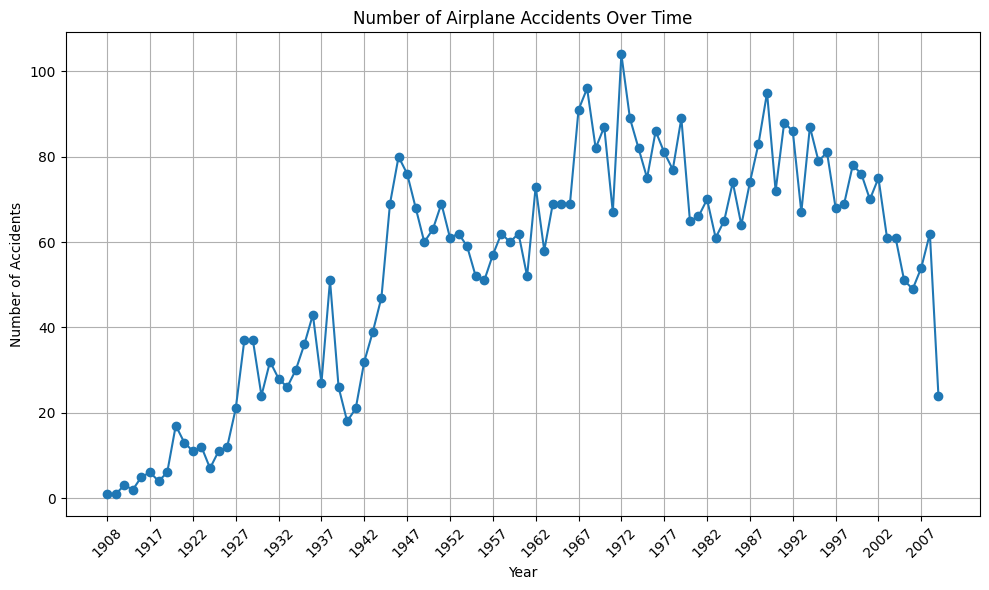

In [4]:
podatki = np.sort(np.array(podatki, dtype=dtype), order='Date')

years = np.array([crash[0][:4] for crash in podatki])
unique_years, crash_counts = np.unique(years, return_counts=True)

sorted_indices = np.argsort(unique_years)
unique_years_sorted = unique_years[sorted_indices]
crash_counts_sorted = crash_counts[sorted_indices]



years = np.unique([entry['Date'][:4] for entry in podatki])
num_accidents = [np.sum([1 for entry in podatki if entry['Date'].startswith(year)]) for year in years]

plt.figure(figsize=(10, 6))
plt.plot(years, num_accidents, marker='o', linestyle='-')
plt.title('Number of Airplane Accidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.xticks(years[::5], rotation=45)  # Show ticks for every 5th year, adjust as needed
plt.tight_layout()
plt.show()


# Prve ugotovitve:
- Nazačetku manj nesreč saj se je letalska industrija še razvijala
- Velik porast nesreč v 2. svetovni vojni

['Douglas DC-3' 'de Havilland Canada DHC-6 Twin Otter 300' 'Douglas C-47A'
 'Douglas C-47' 'Douglas DC-4' 'Yakovlev YAK-40' 'Antonov AN-26'
 'Junkers JU-52/3m' 'Douglas C-47B' 'De Havilland DH-4']
Douglas DC-3 : 334
de Havilland Canada DHC-6 Twin Otter 300 : 81
Douglas C-47A : 74
Douglas C-47 : 62
Douglas DC-4 : 40
Yakovlev YAK-40 : 37
Antonov AN-26 : 36
Junkers JU-52/3m : 32
Douglas C-47B : 29
De Havilland DH-4 : 28


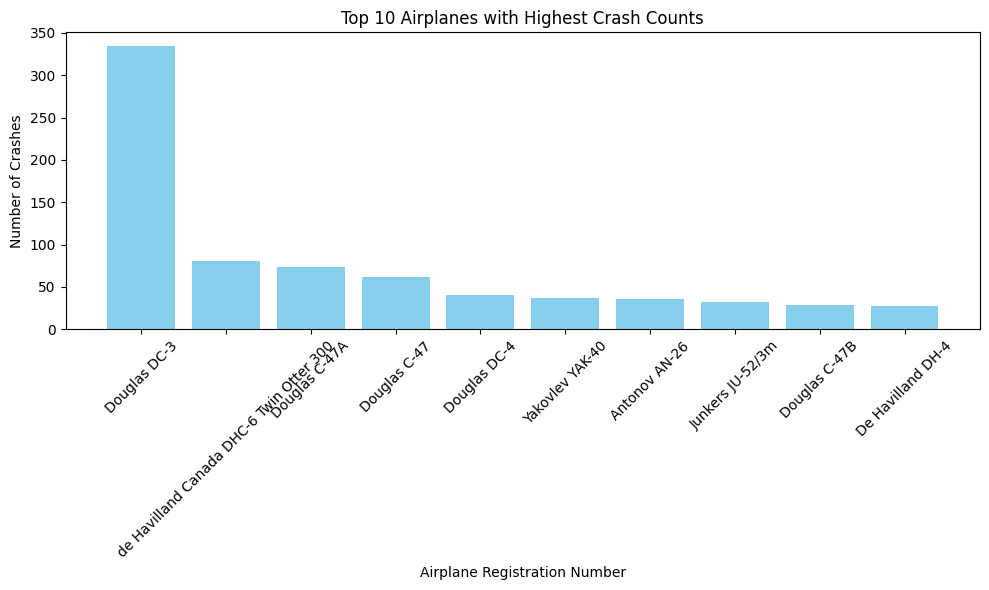

In [5]:
# Extract registration numbers of airplanes
registrations = np.array([crash[6] for crash in podatki])  # Assuming the registration number is at index 7

# Get unique registration numbers and their counts
unique_registrations, counts = np.unique(registrations, return_counts=True)

# Sort by counts in descending order to get the top 10 airplanes with highest crash counts
sorted_indices = np.argsort(counts)[::-1]  # Sort indices in descending order
top_10_indices = sorted_indices[:10]  # Get the indices of the top 10 airplanes
top_10_airplanes = unique_registrations[top_10_indices]  # Get the registration numbers of the top 10 airplanes

print(top_10_airplanes)

# Print top 10 airplanes with highest crash counts

top_10_dict = {}

for airplane in top_10_airplanes:
    count = counts[np.where(unique_registrations == airplane)[0][0]]  # Get count for the current airplane
    print(airplane, ":", count)
    top_10_dict[airplane] = count
    # Save to dict

airplanes = list(top_10_dict.keys())
crash_counts = list(top_10_dict.values())

plt.figure(figsize=(10, 6))
plt.bar(airplanes, crash_counts, color='skyblue')
plt.title('Top 10 Airplanes with Highest Crash Counts')
plt.xlabel('Airplane Registration Number')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Uspešnost letalskih podjetij glede na število mrtvih, število potnikov in število letov

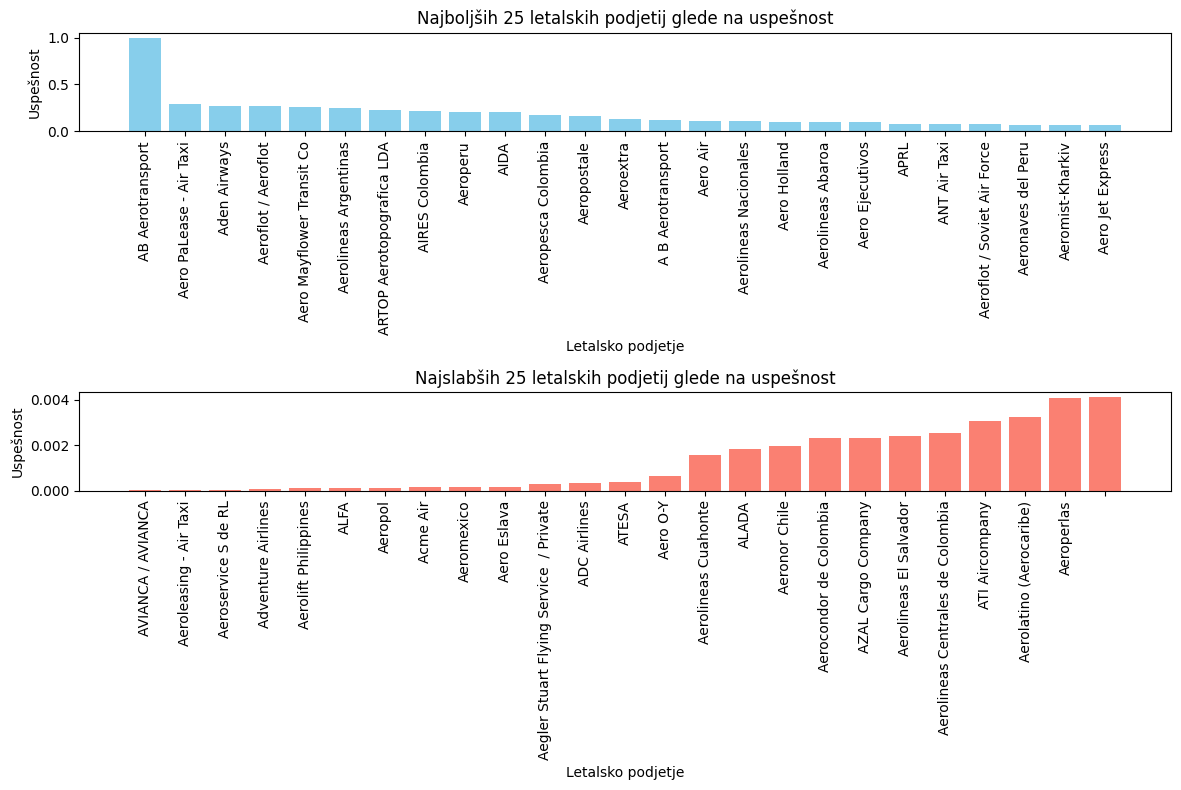

In [6]:
# Izračunamo izraz (število žrtev * število potnikov) - število letal za vsako letalsko podjetje
podjetja = np.unique([entry['Operator'] for entry in podatki])
uspešnost = []
for podjetje in podjetja:
    nesreče_podjetja = [entry for entry in podatki if entry['Operator'] == podjetje]
    število_letov = np.sum([1 for entry in podatki if entry['Operator'] == podjetje])
    if(število_letov > 5):
        skupno_mrtvih = np.sum([entry['Fatalities'] for entry in nesreče_podjetja])
        skupno_potnikov = np.sum([entry['Aboard'] for entry in nesreče_podjetja])
        
        izraz = (skupno_mrtvih * skupno_potnikov) / število_letov
        uspešnost.append(izraz)

max_uspešnost = max(uspešnost)
uspešnost = [x / max_uspešnost for x in uspešnost]



# Pridobimo top 25 in lowest 25 letalskih podjetij glede na izraz
sorted_indices_top = np.argsort(uspešnost)[::-1][:25]
sorted_indices_lowest = np.argsort(uspešnost)[:25]
top_podjetja = podjetja[sorted_indices_top]
lowest_podjetja = podjetja[sorted_indices_lowest]
top_uspešnost = np.array(uspešnost)[sorted_indices_top]
lowest_uspešnost = np.array(uspešnost)[sorted_indices_lowest]

# Priprava stolpičnih grafov
plt.figure(figsize=(12, 8))

# Top 25 letalskih podjetij
plt.subplot(2, 1, 1)
plt.bar(top_podjetja, top_uspešnost, color='skyblue')
plt.xlabel('Letalsko podjetje')
plt.ylabel('Uspešnost')
plt.title('Najboljših 25 letalskih podjetij glede na uspešnost')
plt.xticks(rotation=90)

# Lowest 25 letalskih podjetij
plt.subplot(2, 1, 2)
plt.bar(lowest_podjetja, lowest_uspešnost, color='salmon')
plt.xlabel('Letalsko podjetje')
plt.ylabel('Uspešnost')
plt.title('Najslabših 25 letalskih podjetij glede na uspešnost')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()